In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

import networkx as nx  # Library for hanling graphs (please check 4_Introduction_Graph)
import random # possibility to create random numbers (The "P" in PRM)
import numpy as np
import math

# sort nearest neighbour brute force
import heapq

# reduce coding effort by using function provided by scipy
from scipy.spatial.distance import euclidean

In [2]:
def inSameConnectedComponent(node1, node2, graph):
    """ Check whether to nodes are part of the same connected component using
        functionality from NetworkX
    """
    for connectedComponent in nx.connected_components(graph):
        if (node1 in connectedComponent) & (node2 in connectedComponent):
            return True
        
    return False

In [3]:
import random

def Gaussian_sampling(collChecker):
    
    limits = collChecker.getEnvironmentLimits()        
    pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    
    
    #get a colliding point
    for t in range(0,10):
        while not collChecker.pointInCollision(pos):
            pos = [random.uniform(limit[0],limit[1]) for limit in limits]
        
        #store the x and y value of the colliding point
        pos_x=pos[0]
        pos_y=pos[1]
    
        #find a non colliding point in a given distance to point a 
        for i in range(0,200):
        #get a distance over a gaussian distribution   
            me,sigma = 4,.5 #Mean value of the gaussian distribution, standard deviation 
            d=np.random.normal(me,sigma)
            for n in range(0,200):
                alpha=random.uniform(0,360)*(180/math.pi) #get an random angle in rad
                pos2_x=d*math.cos(alpha)+pos_x
                pos2_y=d*math.sin(alpha)+pos_y
                pos2=[pos2_x,pos2_y]
                if not collChecker.pointInCollision(pos2): #return point when collision free
                    return pos2
    
    
    #if no point found with gaussian pick a random collison free point
    while not collChecker.pointInCollision(pos):
        pos = [random.uniform(limit[0],limit[1]) for limit in limits]
    return pos
            
            
   

In [4]:

def nearestNeighboursX(pos, graph, radius):
    """ Brute Force method to find all nodes of a 
    graph near the given position **pos** with in the distance of
    **radius** in **increasing order**"""
    
    heap = list()
    for node in graph.nodes(data=True): # using (data=True) will generate a list of nodes with all attributes
        if euclidean(node[1]['pos'],pos) < radius:
            # use a heap-queue to sort the nodes in increasing order
            heapq.heappush(heap, (euclidean(node[1]['pos'] ,pos), node))
            #if len(heap) > 2 :
            #    break

    result = list()
    while len(heap) > 0 :
         result.append(heapq.heappop(heap)) 
    
    return result
            
            

In [5]:
def learnRoadmapNearestNeighbour(graph, dim, radius, numNodes, collisionChecker):
    i = 1
    while i < numNodes:
        
        # Generate a 'randomly chosen, free configuration'
        pos = Gaussian_sampling(collisionChecker)
        
        # Find set of candidates to connect to sorted by distance
        result = nearestNeighboursX(pos, graph, radius)
        
        # check connection
        graph.add_node(i, pos=pos)
        for idx, data in enumerate(result):
            if not inSameConnectedComponent(i,data[1][0],graph):
                if not collisionChecker.lineInCollision(pos,data[1][1]['pos']):
                    graph.add_edge(i,data[1][0])
                    
        i+=1


In [6]:
def findPath(graph, start, goal,collisionChecker):
    # find nearest, collision-free connection between node on graph and start
    result = nearestNeighboursX(start, graph, radius)
    for node in result:
        if not collisionChecker.lineInCollision(start,node[1][1]['pos']):
            graph.add_node("start", pos=start)
            graph.add_edge("start",node[1][0])
            break;
    # find nearest, collision-free connection between node on graph and goal
    result = nearestNeighboursX(goal, graph, radius)
    
    for node in result:
        if not collisionChecker.lineInCollision(goal,node[1][1]['pos']):
            graph.add_node("goal", pos=goal)
            graph.add_edge("goal",node[1][0])
            break;
    # find shortest path on graph
    path = nx.shortest_path(graph,"start","goal")
    # return nodelist
    return path
    

In [7]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                )
    
   
    

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000', ax = ax)


In [8]:
import importlib
import IPTestSuite

importlib.reload(IPTestSuite)

dim=2

In [9]:
for benchmark in IPTestSuite.benchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
Spirals
Entrance
Entrances
KIT
Inside
SSL
Ring
Hemispheres
Hammerhead
Zigzag
Spiral
medium
medium2
L-square
Teeth
Gearshift
Squares_easy
Zigzag_medium
Zigzag_hard
Japan
Haystack
HairPerson


Planning:  Trap
['start', 72, 16, 32, 9, 35, 48, 64, 85, 91, 166, 216, 255, 213, 189, 7, 13, 112, 132, 94, 4, 24, 33, 233, 235, 248, 168, 133, 52, 37, 19, 36, 20, 18, 3, 1, 22, 29, 31, 'goal'] 40
301
Planning:  Bottleneck


c:\Users\Jonas\Documents\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


Failed Either source start or target goal is not in G
Planning:  Fat bottleneck
Failed Either source start or target goal is not in G
Planning:  Spirals
Failed Either source start or target goal is not in G
Planning:  Entrance
['start', 86, 3, 47, 135, 111, 80, 70, 35, 22, 17, 25, 14, 10, 11, 19, 58, 8, 50, 33, 6, 12, 60, 189, 231, 'goal'] 26
301
Planning:  Entrances
Failed No path between start and goal.
Planning:  KIT
Failed Either source start or target goal is not in G
Planning:  Inside
['start', 57, 50, 1, 14, 30, 33, 15, 23, 27, 79, 76, 107, 125, 38, 34, 48, 45, 100, 213, 230, 'goal'] 22
301
Planning:  SSL


c:\Users\Jonas\Documents\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


['start', 48, 23, 84, 131, 89, 80, 73, 68, 112, 120, 36, 35, 20, 8, 2, 10, 98, 90, 115, 117, 108, 77, 63, 70, 12, 18, 27, 62, 114, 45, 19, 33, 67, 53, 118, 3, 'goal'] 38
301
Planning:  Ring
['start', 192, 95, 3, 23, 40, 9, 57, 44, 92, 86, 28, 19, 49, 11, 25, 60, 93, 105, 177, 178, 7, 18, 26, 34, 65, 260, 'goal'] 28
301
Planning:  Hemispheres
Failed Either source start or target goal is not in G
Planning:  Hammerhead
['start', 136, 57, 58, 131, 98, 77, 97, 104, 11, 92, 29, 111, 125, 159, 242, 'goal'] 17
301
Planning:  Zigzag
Failed No path between start and goal.
Planning:  Spiral
['start', 31, 218, 248, 3, 103, 156, 13, 92, 125, 47, 8, 72, 56, 35, 29, 83, 258, 78, 69, 24, 38, 179, 6, 5, 66, 63, 108, 104, 30, 88, 46, 126, 129, 11, 97, 55, 51, 37, 41, 74, 110, 43, 45, 20, 33, 50, 91, 123, 26, 18, 25, 49, 87, 17, 117, 40, 16, 7, 12, 22, 44, 99, 85, 15, 4, 113, 145, 118, 48, 32, 9, 291, 'goal'] 74
301
Planning:  medium
Failed No path between start and goal.
Planning:  medium2
['start', 36,

C:\Users\Jonas\AppData\Local\Temp/ipykernel_7780/3256795944.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


['start', 214, 5, 79, 22, 6, 27, 117, 173, 33, 2, 7, 17, 73, 152, 131, 47, 21, 19, 31, 23, 86, 24, 104, 41, 20, 30, 8, 3, 15, 87, 75, 103, 1, 11, 54, 106, 60, 213, 10, 153, 48, 182, 146, 34, 4, 45, 14, 115, 116, 114, 156, 227, 'goal'] 54
301
Planning:  Japan
['start', 166, 66, 34, 21, 7, 2, 29, 23, 15, 25, 30, 18, 5, 16, 1, 32, 22, 10, 14, 9, 4, 3, 68, 196, 'goal'] 26
301
Planning:  Haystack
Failed No path between start and goal.
Planning:  HairPerson
['start', 118, 7, 20, 12, 4, 18, 27, 23, 26, 28, 60, 139, 54, 104, 82, 74, 37, 125, 42, 129, 33, 94, 11, 52, 72, 73, 21, 5, 44, 9, 41, 173, 245, 'goal'] 35
301


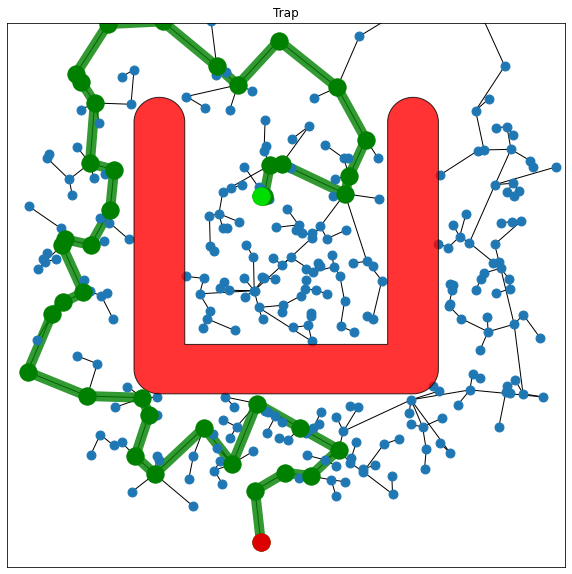

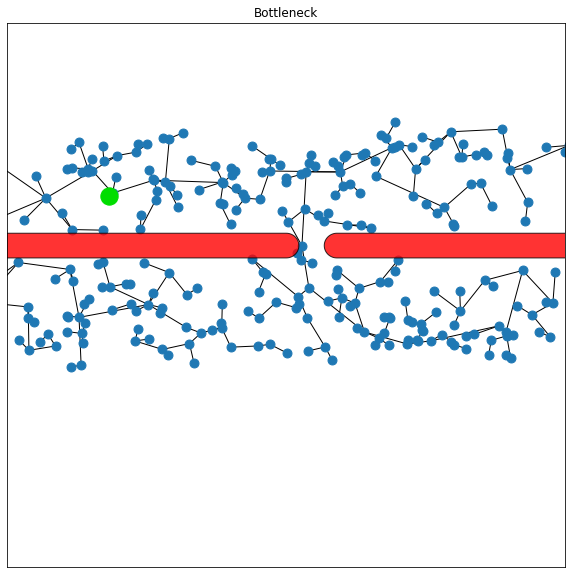

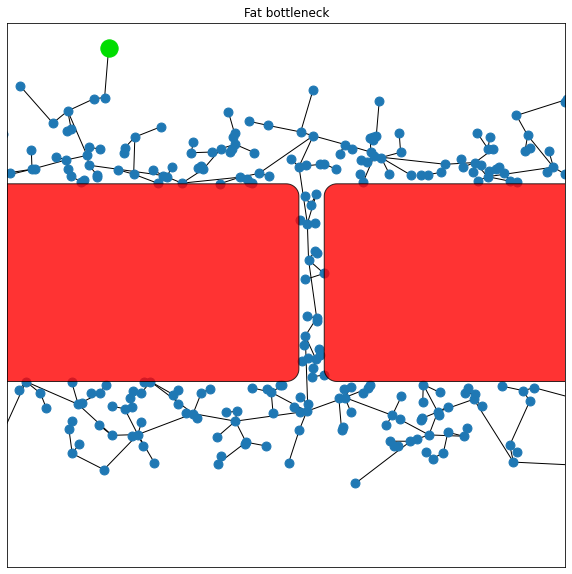

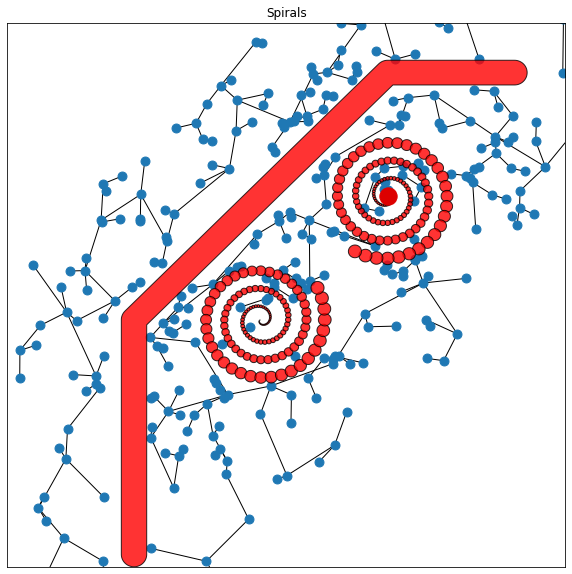

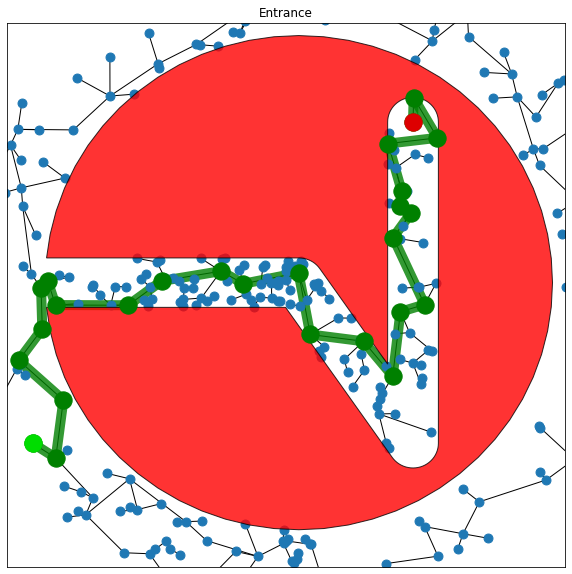

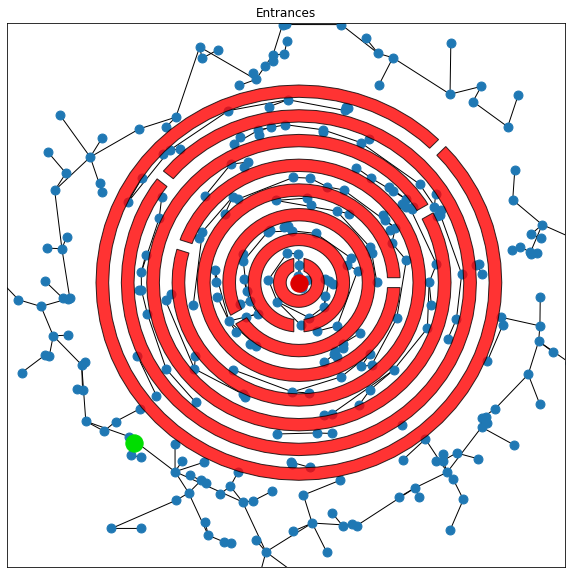

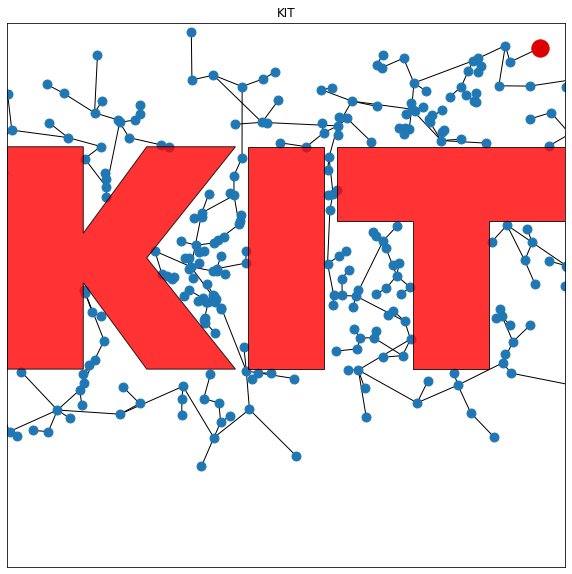

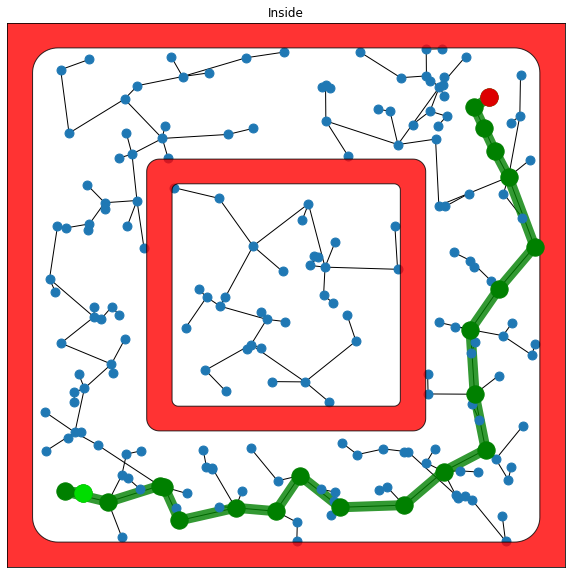

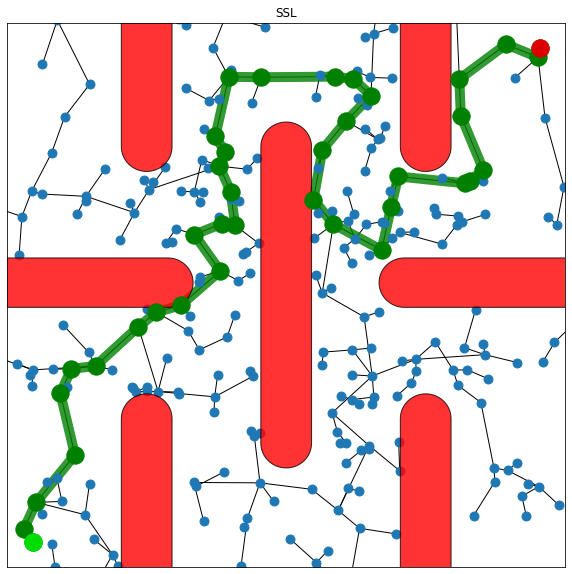

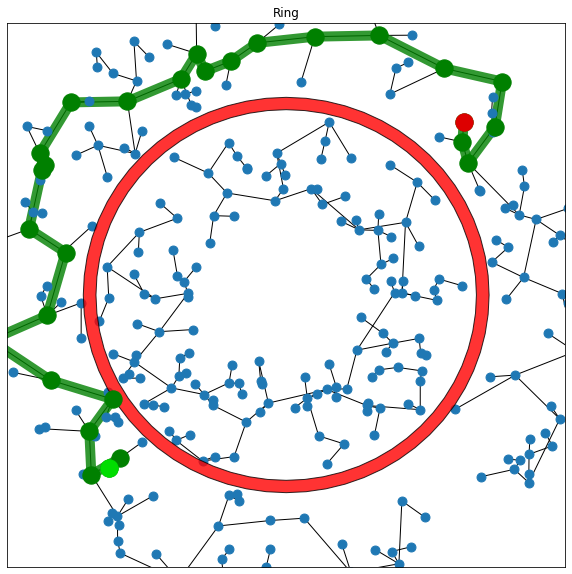

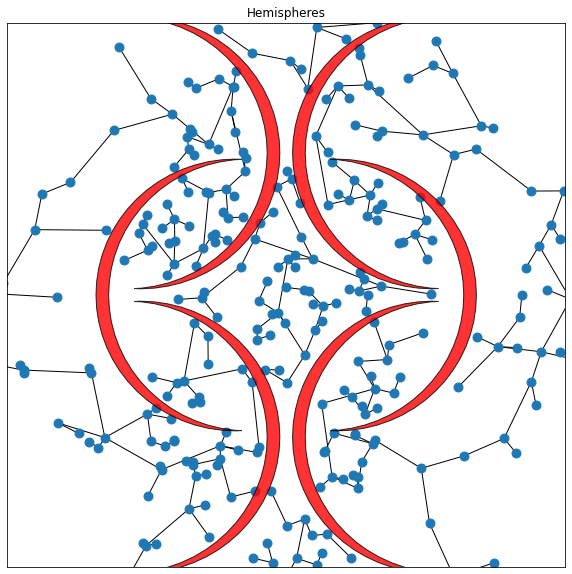

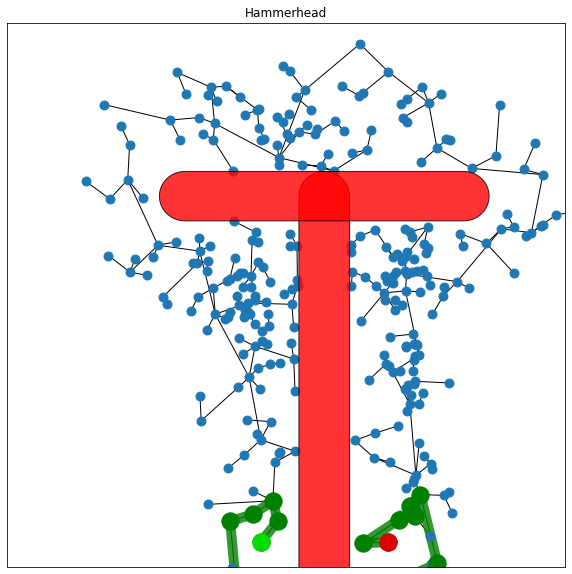

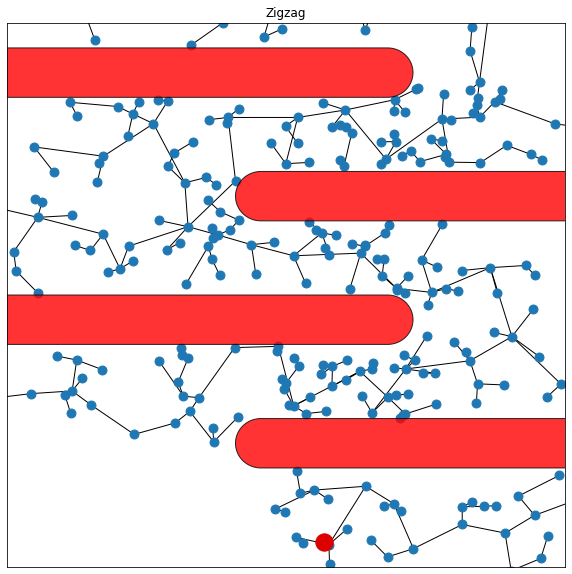

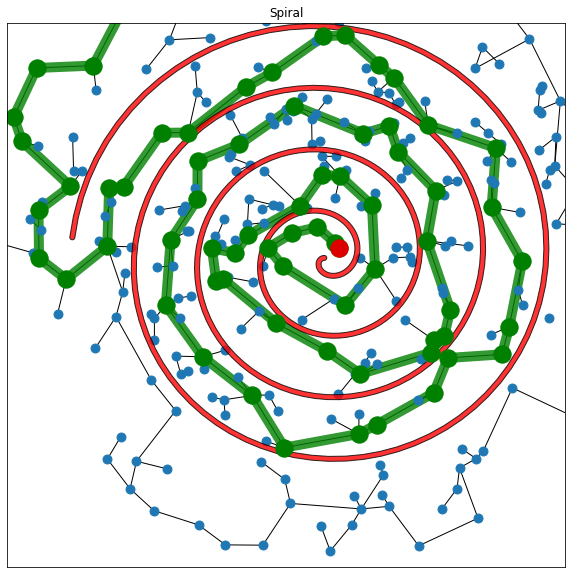

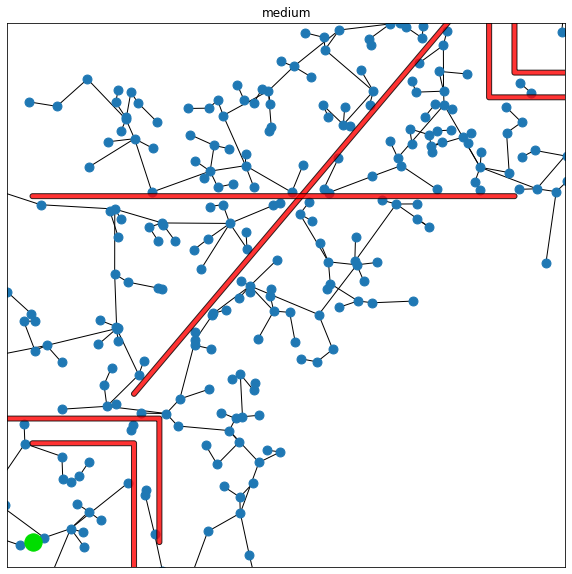

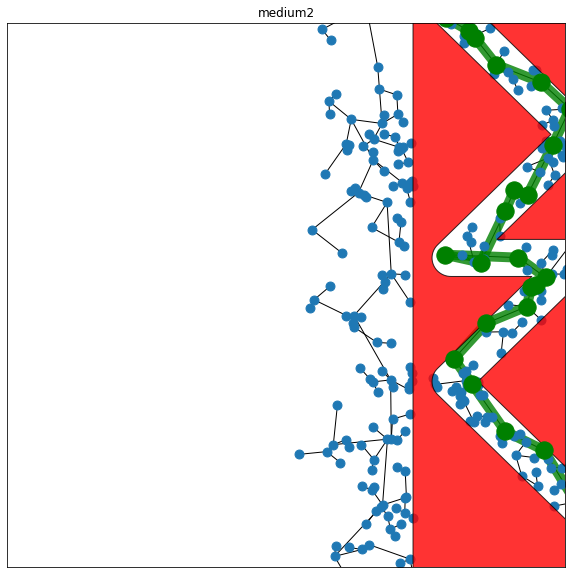

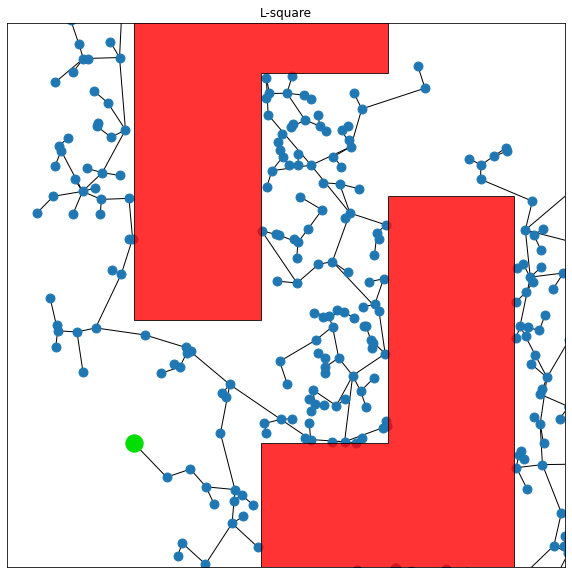

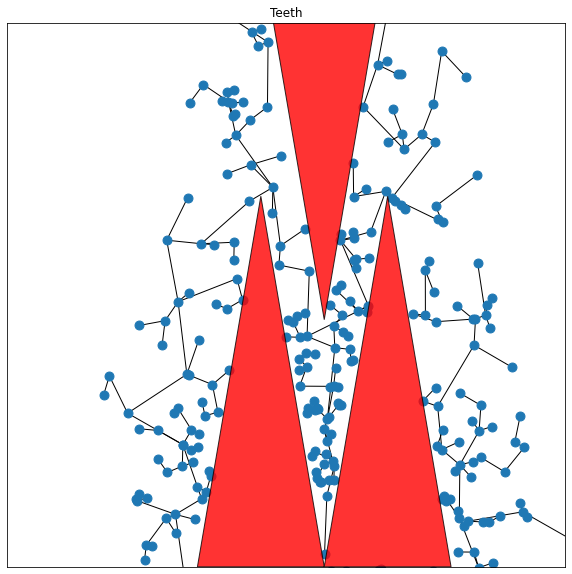

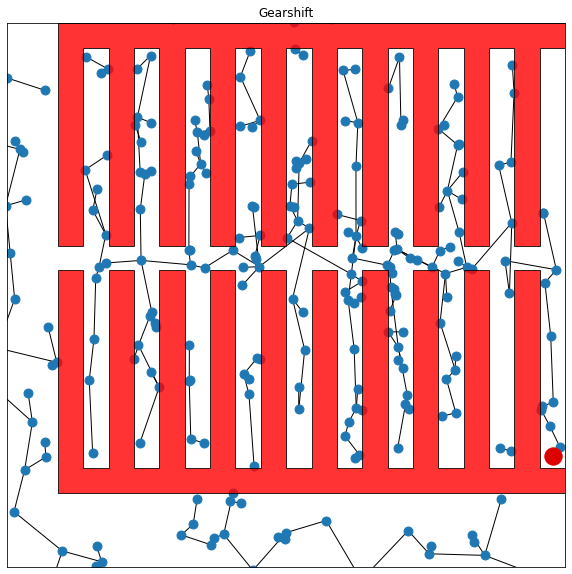

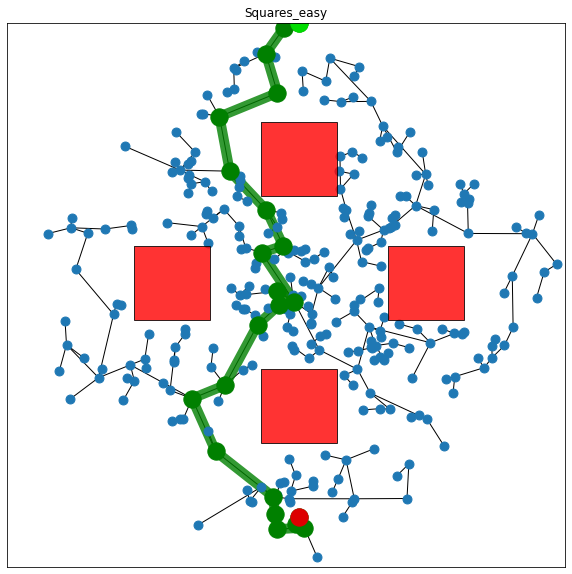

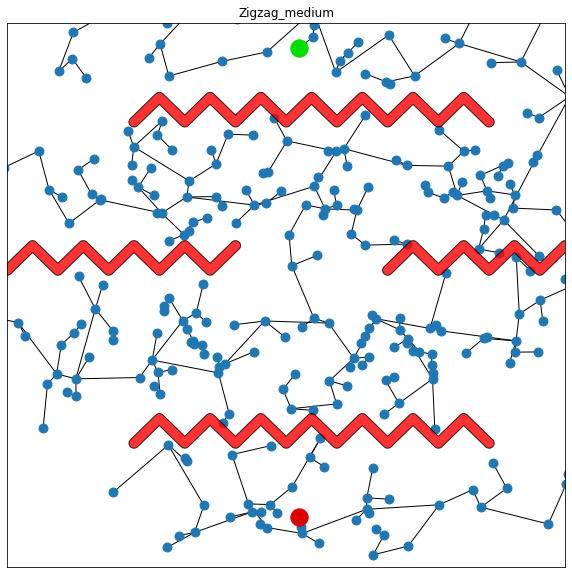

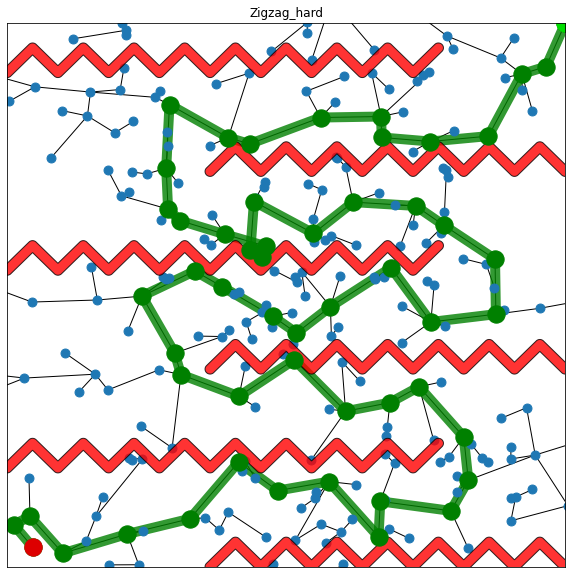

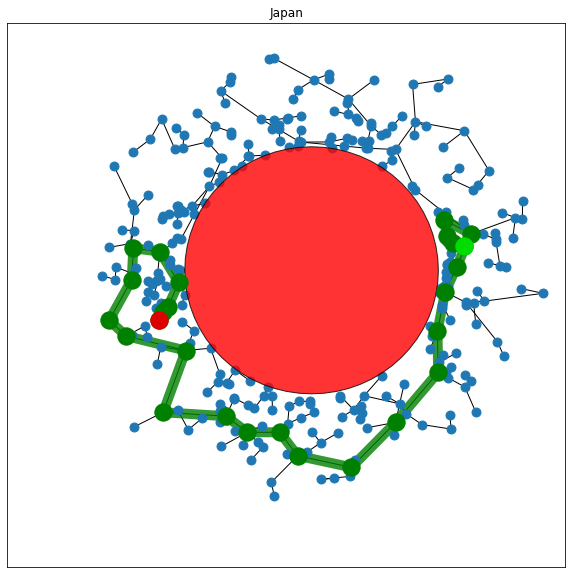

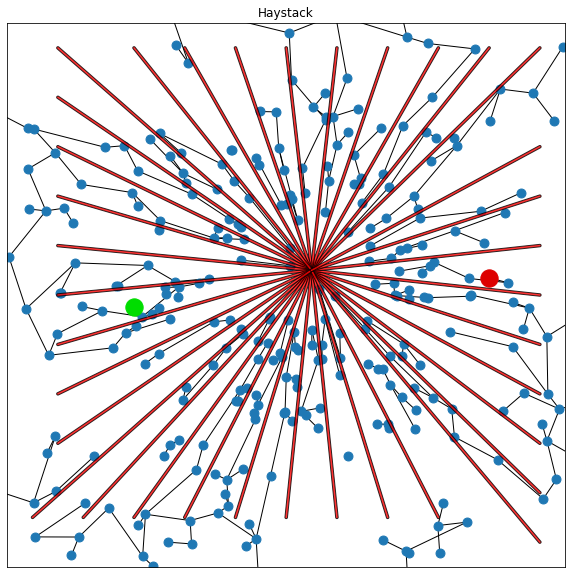

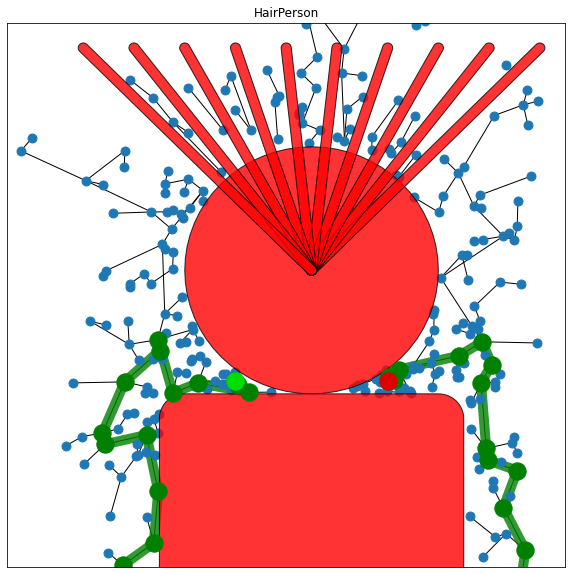

In [10]:
for benchmark in IPTestSuite.benchList:
    try:
        print ("Planning: ", benchmark.name)
        collChecker = benchmark.collisionChecker
        G = nx.Graph()
        radius = 3.0
        numNodes = 300
        learnRoadmapNearestNeighbour(G, dim, radius, numNodes, collChecker)
        solution = findPath(G,benchmark.startList[0],benchmark.goalList[0], collChecker)
        print(solution, len(solution))
        print(len(G.nodes()))
        
    except Exception as e:
        solution = []
        print ("Failed", e)
    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(benchmark.name)
    basicPRMVisualize(G,collChecker,solution,nodeSize=80,ax=ax)